In [6]:
import numpy as np

def setup():
    size(100, 100)
    
    global n 
    n = 1
    
    global photo, result_photo
    photo = load_image("../Lenna_(test_image).png")
    window_resize(photo.width, photo.height)
    
    # load numpy array of pixels
    photo.load_np_pixels()
    print(f'Size of the original image: {photo.np_pixels.shape}')
    
    result_photo = create_image(photo.width, photo.height, ARGB)
        
    no_loop()

def draw():
    global n, result_photo
    
    print(f'Drawing...')
    
    result_array = photo.np_pixels[::n, ::n] # downsampling by picking row and column by N increment 
    print(f'Size of the modified image: {result_array.shape}')
    
    result_array = np.repeat(result_array, n, axis = 0) # interpolate on x by copying the columns N time
    result_array = np.repeat(result_array, n, axis = 1) # interpolate on y by copying the row N time
    
    create_image_from_numpy(result_array, 'ARGB', dst = result_photo) # update result_photo from the numpy array
    image(result_photo, 0, 0)
    
def key_pressed():
    global n
    
    if key == CODED:
        if key_code == UP and (n < min(photo.width, photo.height)):
            n *= 2
            redraw()
        elif key_code == DOWN and (n > 1):
            n //= 2
            redraw()
    
run_sketch()

Size of the original image: (512, 512, 4)
Drawing...
Size of the modified image: (512, 512, 4)
Drawing...
Size of the modified image: (256, 256, 4)
Drawing...
Size of the modified image: (128, 128, 4)
Drawing...
Size of the modified image: (64, 64, 4)


In [7]:
save_frame("./downsampling_0001.png", use_thread=True) 

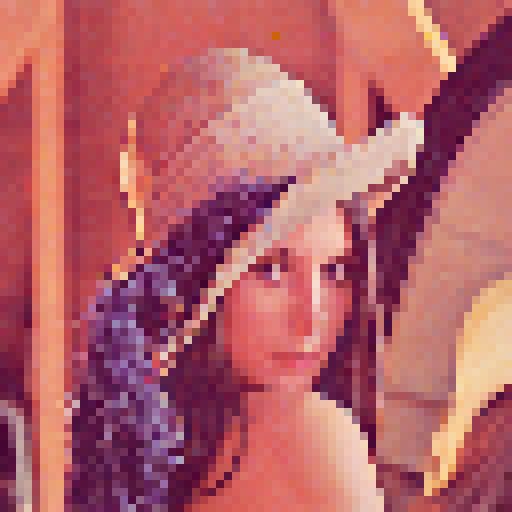